In [11]:
import matplotlib.pyplot as plt
plt.style.use('chartStyle.mplstyle')

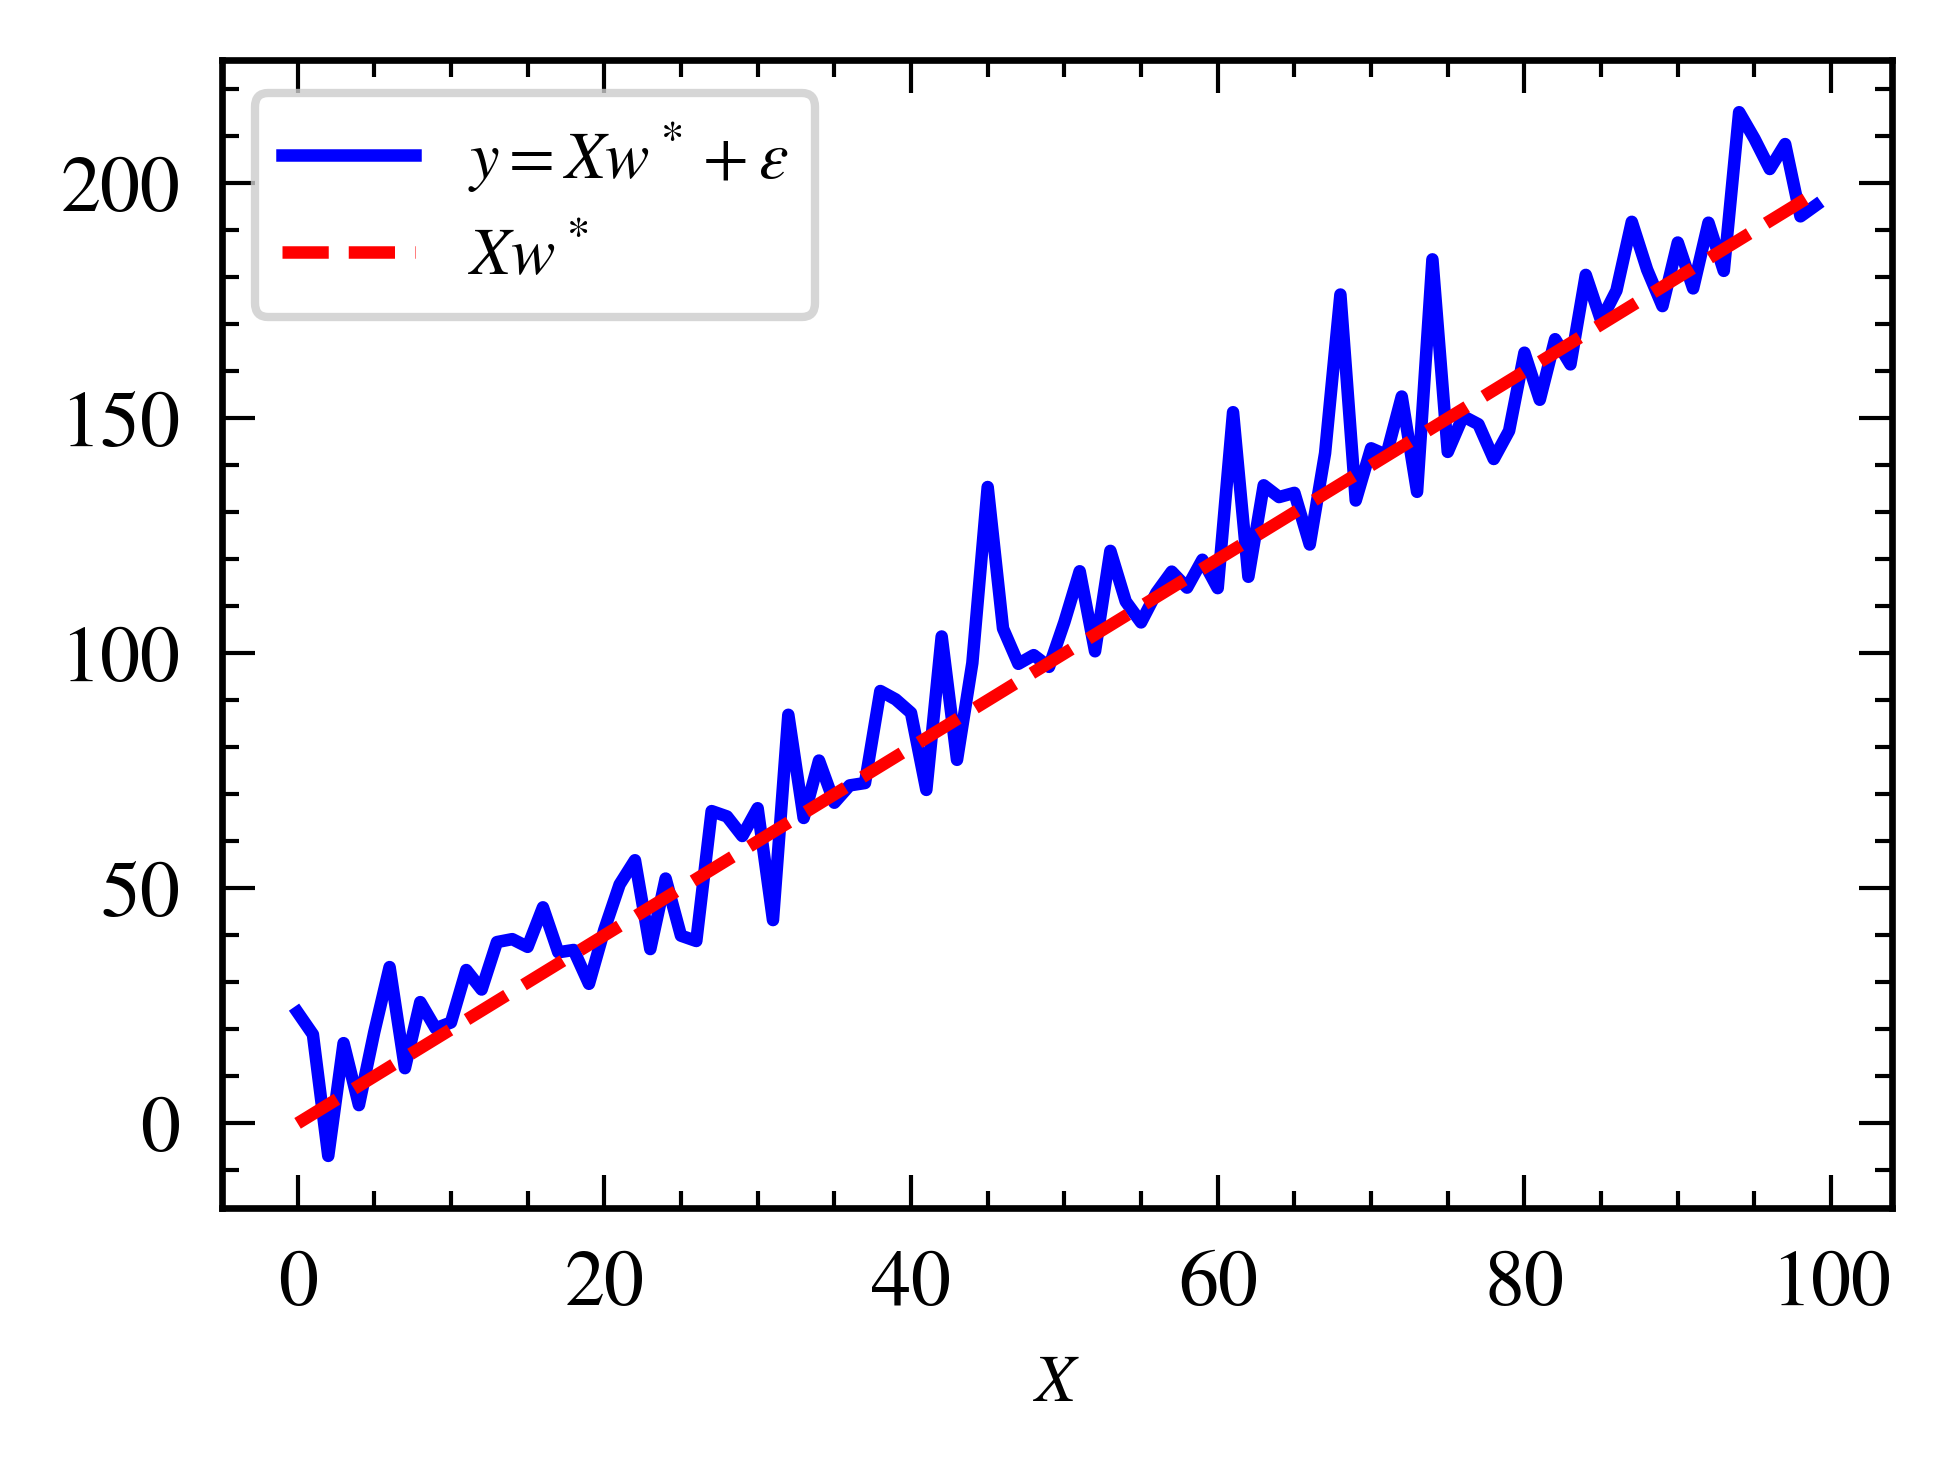

In [17]:
import numpy as np

fig, ax = plt.subplots()
size = 100
x = np.arange(size)
y = 2 * x
epsilon = np.random.gumbel(loc=-1, scale=10, size=size)
f = y + epsilon
ax.plot(x, f, label=rf'$y=Xw^*+\epsilon$')
ax.plot(x, y, label=r'$Xw^*$')
ax.set_xlabel(r'$X$')
ax.legend()
fig.tight_layout()
fig.savefig('exampleData.png', dpi=400)

/var/folders/3d/7j0pnmj52_d00wg07vphgncr0000gn/T/ipykernel_91849/3319723850.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


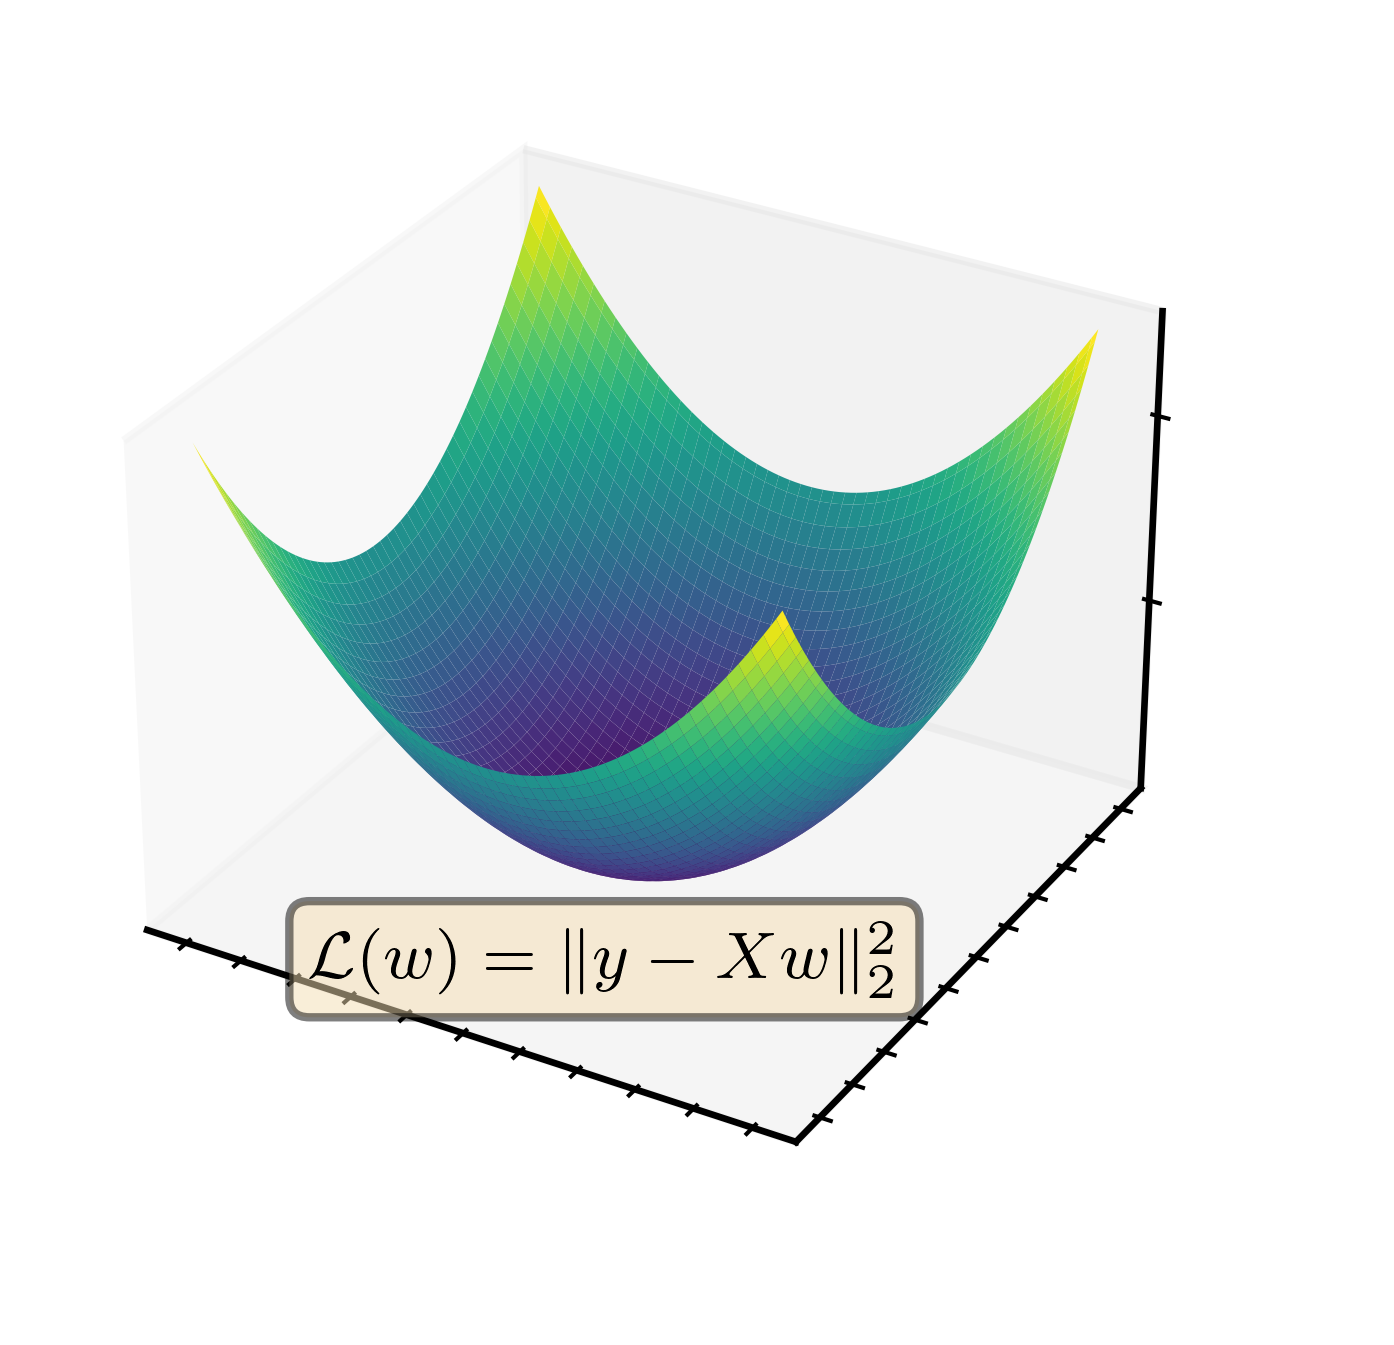

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
L = (X**2 + Y**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, L, cmap='viridis')
ax.text(-2.7, -5.8, 0, s=r'$\mathcal{L}(w)=\lVert y-Xw\rVert_2^2$', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
fig.tight_layout()
fig.savefig('lossFunction.png', dpi=400, bbox_inches='tight')
plt.show()

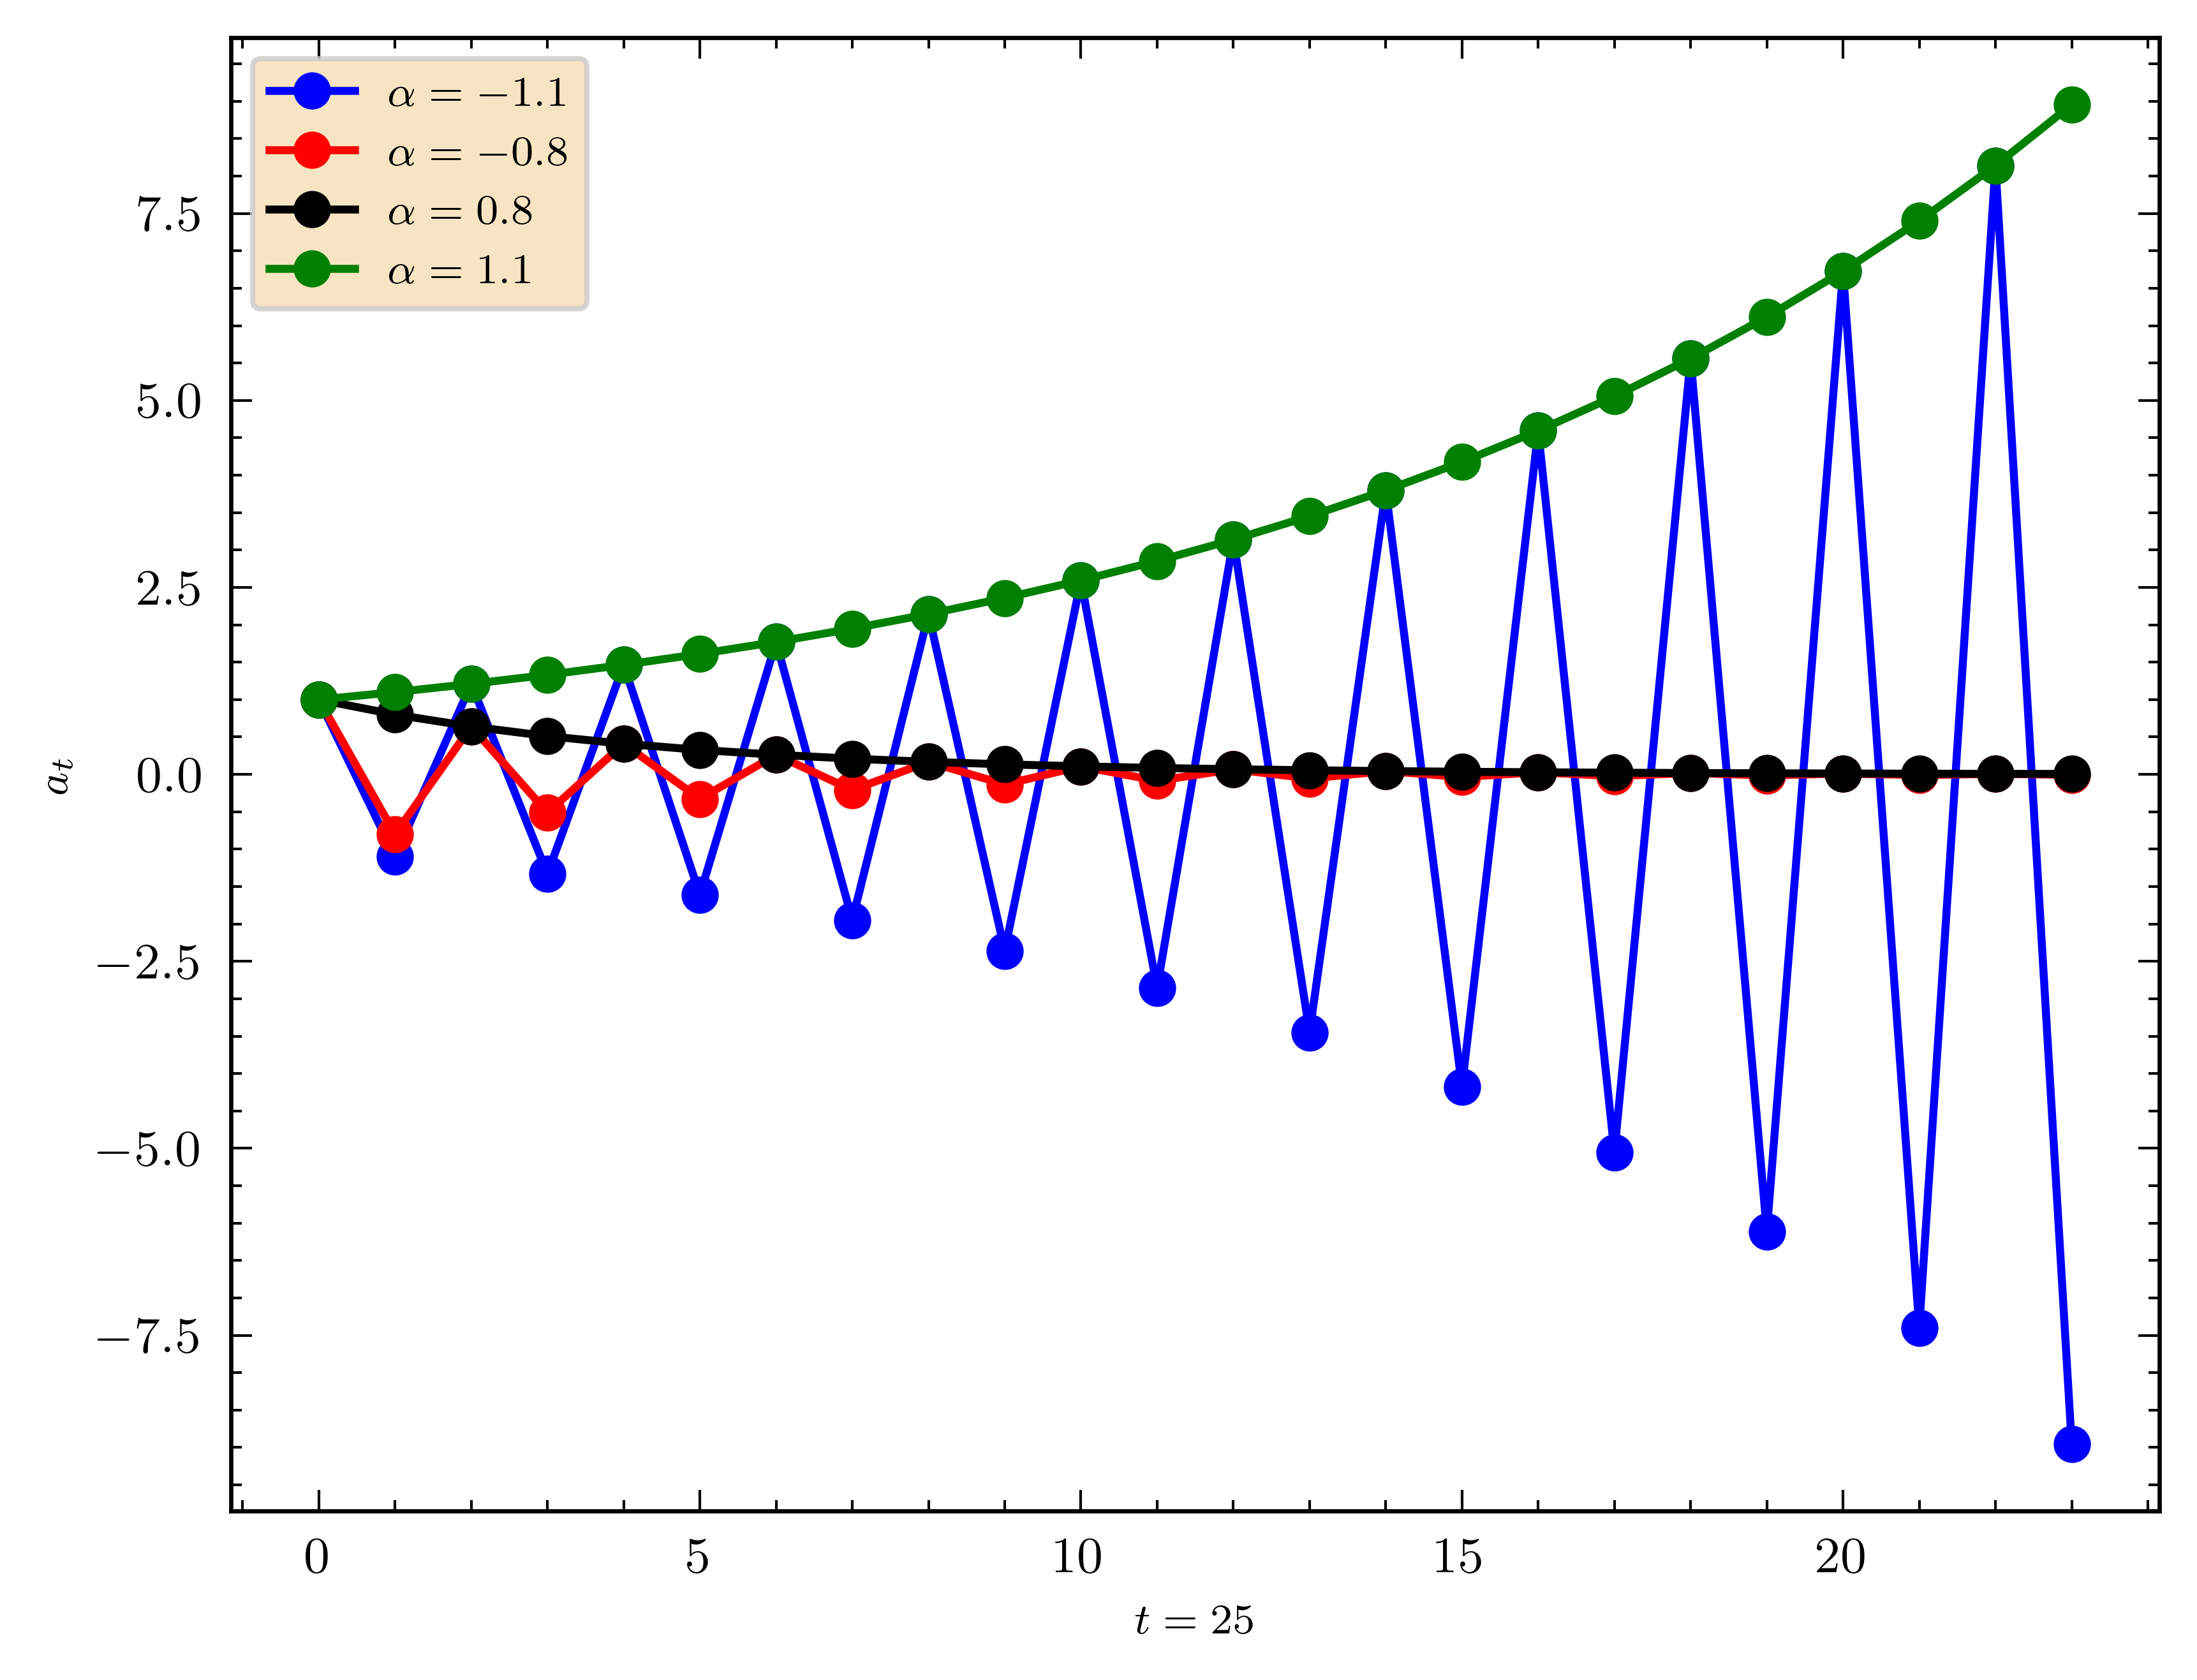

In [27]:
import numpy as np
from matplotlib.animation import FuncAnimation

# Function to generate autoregressive sequence
def autoregressive_sequence(alpha, num_steps):
    a = [1.0]  # Initial value
    for _ in range(1, num_steps):
        a.append(alpha * a[-1])
    return a

# Parameters
alphas = [-1.1, -0.8, 0.8, 1.1] 
num_steps = 25  # Number of steps in the sequence

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6.5, 5))

# Initialize an empty plot
line, = ax.plot([], marker='o', linestyle='-')

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    ax.set_xlabel(rf'$t={frame+1}$')
    ax.set_ylabel(rf'$a_t$')
    for alpha in alphas:
        sequence = autoregressive_sequence(alpha, frame)
        ax.plot(sequence, marker='o', linestyle='-', label=rf'$\alpha = {alpha}$')
    ax.legend(loc='upper left', facecolor='wheat')

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps, repeat=False)

# Save the animation as a GIF
ani.save('autoregressive_overlay.gif', writer='pillow', fps=0.9)

# Show the plot
plt.show()
